# Playlist Dataset's Exploratory Data Analyses

This notebook presents an exploratory data analysis of a Brazilian music (MPB) playlist dataset.

It will analyze various aspects of the data including song distribution, artists, albums, and temporal patterns.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('default') 
sns.set_theme(style="whitegrid") 
pd.set_option('display.max_columns', None)

In [4]:
# Load the dataset
df = pd.read_csv('dataset/playlist_metadata.csv')

# Show the first lines of the dataset
print("First lines of the dataset:")
display(df.head())

First lines of the dataset:


,Track Name,Artist,Album,Release Date,Spotify Duration (ms),Spotify Track URL,YouTube Original Video URL,Original Duration,YouTube Piano Solo Video URL,Piano Solo Duration
0,Velha Infância - 2004 Digital Remaster,Tribalistas,Tribalistas,2002-01-01,250440,https://open.spotify.com/track/1mSxbLW7fKABfeY...,https://www.youtube.com/watch?v=iyJDuJggiEM,251000,https://www.youtube.com/watch?v=YcOyefoJec0,146000.0
1,Trem-Bala,Ana Vilela,Trem-Bala,2017-05-12,180319,https://open.spotify.com/track/05QeyKGAn4TZrv4...,https://www.youtube.com/watch?v=sWhy1VcvvgY,181000,https://www.youtube.com/watch?v=7aJF1ed1TpU,179000.0
2,Aliança,Tribalistas,Tribalistas,2017,237421,https://open.spotify.com/track/1DLKuppSYytOuxh...,https://www.youtube.com/watch?v=3JiMr-HgHJ8,251000,https://www.youtube.com/watch?v=I1kwd-UDuec,227000.0
3,O Que É O Que É?,Gonzaguinha,Caminhos Do Coração,1982-08-13,258986,https://open.spotify.com/track/2CoKGyZavJWTFUP...,https://www.youtube.com/watch?v=IYZcsb706q8,261000,https://www.youtube.com/watch?v=CruT6LdL-Uc,219000.0
4,A Banda,Chico Buarque,Chico Buarque de Hollanda,1966-01-01,131000,https://open.spotify.com/track/6wUp7y502iyWLuL...,https://www.youtube.com/watch?v=SSmz9xg4Ks0,131000,https://www.youtube.com/watch?v=8Ba1_LfcFR0,61000.0


In [5]:
# General information about the dataset
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Track Name                    200 non-null    object 
 1   Artist                        200 non-null    object 
 2   Album                         200 non-null    object 
 3   Release Date                  200 non-null    object 
 4   Spotify Duration (ms)         200 non-null    int64  
 5   Spotify Track URL             200 non-null    object 
 6   YouTube Original Video URL    200 non-null    object 
 7   Original Duration             200 non-null    int64  
 8   YouTube Piano Solo Video URL  134 non-null    object 
 9   Piano Solo Duration           134 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [6]:
# Descriptive statistics
display(df.describe())

Descriptive statistics:


,Spotify Duration (ms),Original Duration,Piano Solo Duration
count,200.000000,2.000000e+02,1.340000e+02
mean,237401.550000,2.686350e+05,2.029627e+05
std,50066.106159,3.823646e+05,1.912563e+05
min,131000.000000,6.000000e+04,1.600000e+04
25%,202138.250000,2.000000e+05,1.307500e+05
50%,235426.000000,2.395000e+05,1.840000e+05
75%,266103.250000,2.772500e+05,2.340000e+05
max,400626.000000,5.583000e+06,2.085000e+06


In [8]:
# General statistics
print(f"Total of songs: {len(df)}")
print(f"Total of unique artists: {df['Artist'].nunique()}")
print(f"Total of unique albums: {df['Album'].nunique()}")

General statistics:
Total of songs: 200
Total of unique artists: 76
Total of unique albums: 162


In [9]:
# Checking for null values
display(df.isnull().sum())


Null values by column:


Track Name                       0
Artist                           0
Album                            0
Release Date                     0
Spotify Duration (ms)            0
Spotify Track URL                0
YouTube Original Video URL       0
Original Duration                0
YouTube Piano Solo Video URL    66
Piano Solo Duration             66
dtype: int64

In [40]:
# Dropping rows with null values in 'YouTube Piano Solo Video URL' and 'Piano Solo Duration'
df = df.dropna(subset=['YouTube Piano Solo Video URL', 'Piano Solo Duration'])
len(df)

134

Djavan               9
Marisa Monte         7
Milton Nascimento    7
Caetano Veloso       7
ANAVITÓRIA           6
Belchior             5
Tribalistas          5
Zé Ramalho           5
Chico Buarque        5
Gilberto Gil         5
Name: Artist, dtype: int64

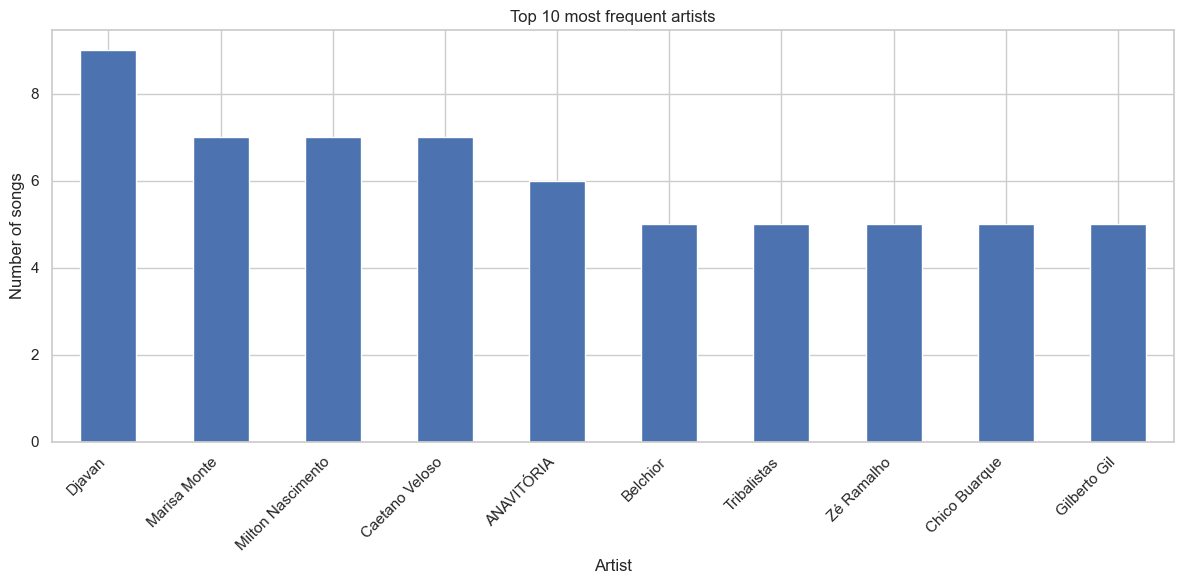

In [28]:
# Artists analysis
display(df['Artist'].value_counts().head(10))

# Visualization of the most frequent artists
plt.figure(figsize=(12, 6))
df['Artist'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most frequent artists')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

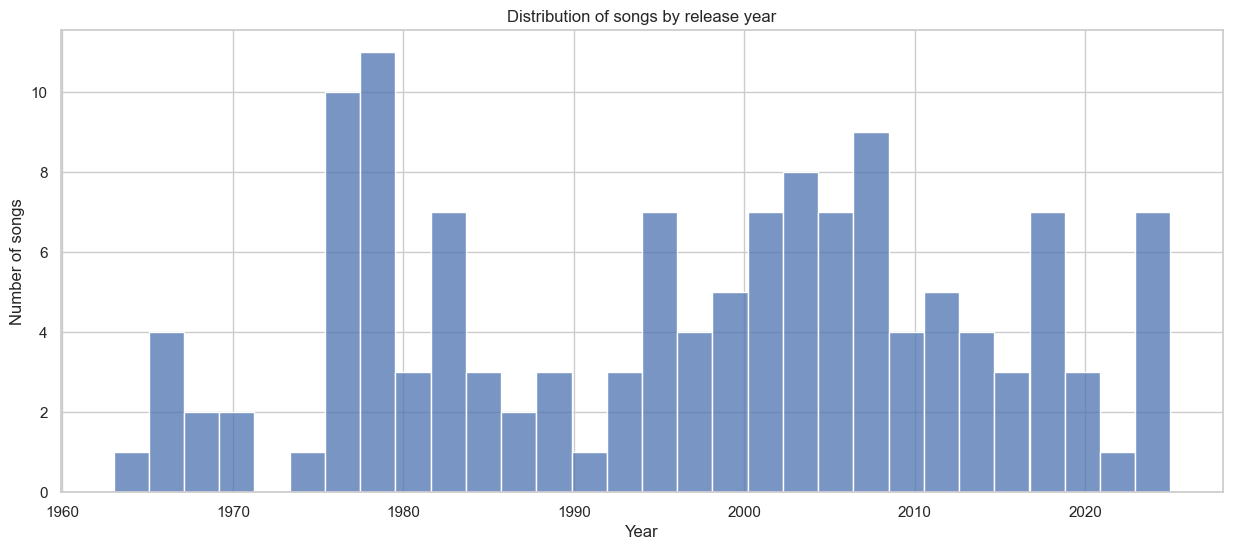


Period covered: from 1963 to 2025


In [29]:
# Temporal analysis
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Year', bins=30)
plt.title('Distribution of songs by release year')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.grid(True)
plt.show()

print(f"\nPeriod covered: from {df['Year'].min()} to {df['Year'].max()}")

In [30]:
# Songs by decade
df['Decade'] = (df['Year'] // 10) * 10
display(df['Decade'].value_counts().sort_index())

1960     7
1970    24
1980    18
1990    18
2000    34
2010    24
2020     9
Name: Decade, dtype: int64

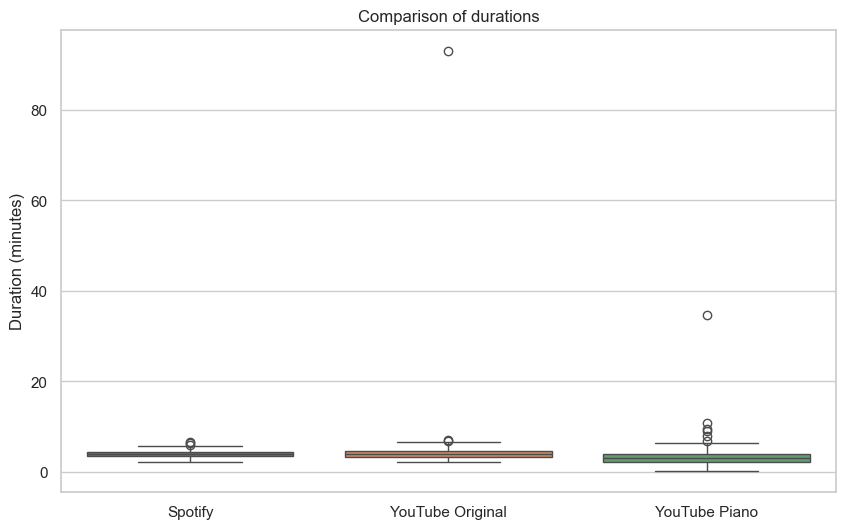

In [31]:
# Duration analysis
# Convert durations to minutes
df['Spotify Duration (min)'] = df['Spotify Duration (ms)'] / 60000
df['Original Duration (min)'] = df['Original Duration'] / 60000
df['Piano Duration (min)'] = df['Piano Solo Duration'] / 60000

# Comparison of durations
duration_comparison = pd.DataFrame({
    'Spotify': df['Spotify Duration (min)'],
    'YouTube Original': df['Original Duration (min)'],
    'YouTube Piano': df['Piano Duration (min)']
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=duration_comparison)
plt.title('Comparison of durations')
plt.ylabel('Duration (minutes)')
plt.show()

In [32]:
# Duration statistics
print("\nDuration statistics (in minutes):")
display(duration_comparison.describe())


Duration statistics (in minutes):


,Spotify,YouTube Original,YouTube Piano
count,134.000000,134.000000,134.000000
mean,3.976566,4.721642,3.382711
std,0.843215,7.747655,3.187605
min,2.183333,2.183333,0.266667
25%,3.455992,3.350000,2.179167
50%,3.926217,4.025000,3.066667
75%,4.421129,4.645833,3.900000
max,6.578433,93.050000,34.750000


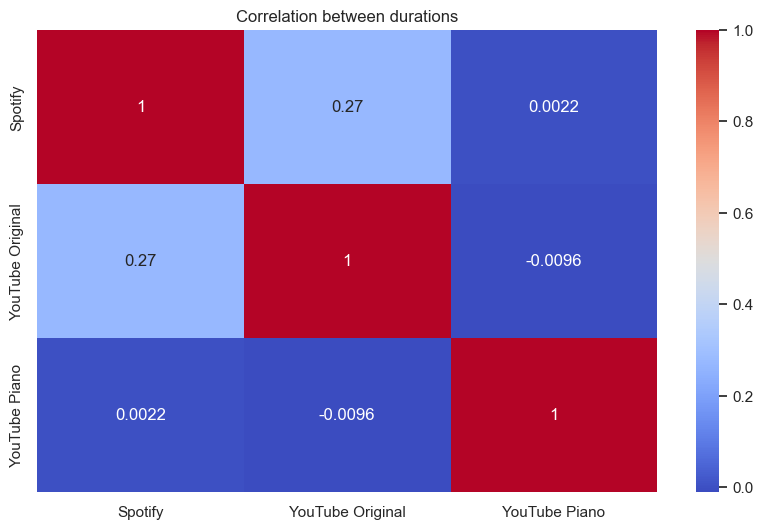

In [33]:
# Correlation between durations
plt.figure(figsize=(10, 6))
sns.heatmap(duration_comparison.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between durations')
plt.show()

Number of songs per album:


Tribalistas                                 5
Esquinas                                    3
Alucinacao                                  3
Infinito Particular                         3
Feito Pra Acabar                            2
Luz                                         2
Essa Boneca Tem Manual (Com Faixa Bônus)    2
Sim                                         2
Falso Brilhante                             2
O Que Você Quer Saber de Verdade            2
Name: Album, dtype: int64

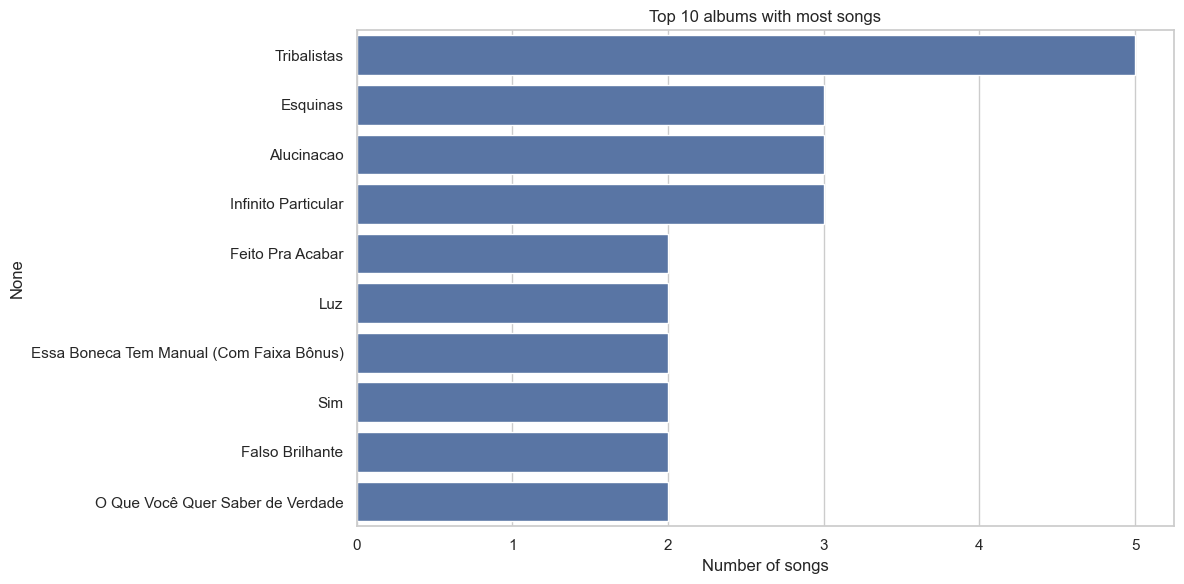

In [34]:
# Album analysis
print("Number of songs per album:")
album_counts = df['Album'].value_counts()
display(album_counts.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=album_counts.head(10).values, y=album_counts.head(10).index)
plt.title('Top 10 albums with most songs')
plt.xlabel('Number of songs')
plt.tight_layout()
plt.show()

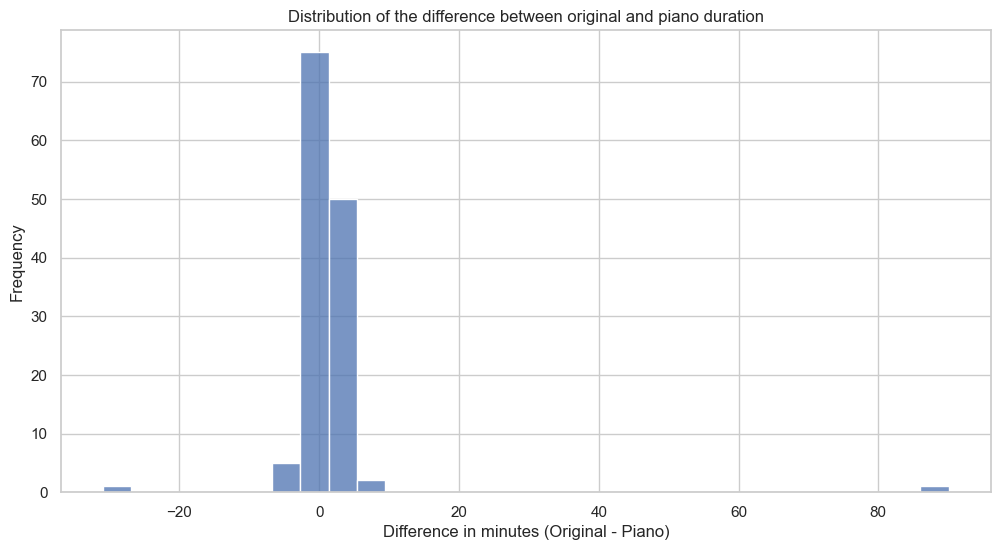

In [38]:
# Calculating differences between durations
df['Diff_Original_Piano'] = df['Original Duration (min)'] - df['Piano Duration (min)']

# Visualizing the distribution of differences
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Diff_Original_Piano', bins=30)
plt.title('Distribution of the difference between original and piano duration')
plt.xlabel('Difference in minutes (Original - Piano)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Top 5 largest differences
display(df.nlargest(5, 'Diff_Original_Piano')[['Track Name', 'Artist', 'Original Duration (min)', 'Piano Duration (min)', 'Diff_Original_Piano']])

,Track Name,Artist,Original Duration (min),Piano Duration (min),Diff_Original_Piano
126,Carta de Amor (Ao Vivo),Maria Bethânia,93.050000,3.000000,90.050000
124,Quando Bate Aquela Saudade,Rubel,6.750000,0.416667,6.333333
125,Nem um Dia,Djavan,5.800000,0.266667,5.533333
158,Cacador De Mim,Milton Nascimento,6.550000,2.216667,4.333333
68,Shy Moon,Ritchie,4.633333,0.600000,4.033333


In [39]:
# Average duration by version
print(f"Spotify: {df['Spotify Duration (min)'].mean():.2f}")
print(f"YouTube Original: {df['Original Duration (min)'].mean():.2f}")
print(f"YouTube Piano: {df['Piano Duration (min)'].mean():.2f}")

Spotify: 3.98
YouTube Original: 4.72
YouTube Piano: 3.38


In [ ]:
# Minimizing outliers based on the IQR method for the specified columns
def remove_duration_outliers(df, columns, n_std=1.5):
    df_clean = df.copy()
    
    for column in columns:
        # Calculating Q1, Q3 and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Defining limits for outliers
        lower_bound = Q1 - n_std * IQR
        upper_bound = Q3 + n_std * IQR
        
        # Creating mask for values within the limits
        mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
        df_clean = df_clean[mask]
    
    return df_clean

In [43]:
# Minimizing outliers
duration_columns = ['Original Duration (min)', 'Piano Duration (min)']
df_no_outliers = remove_duration_outliers(df, duration_columns)

/var/folders/2l/dw3h_m3n5_x9ljsn9qdpxf4h0000gn/T/ipykernel_42030/1560262338.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[mask]


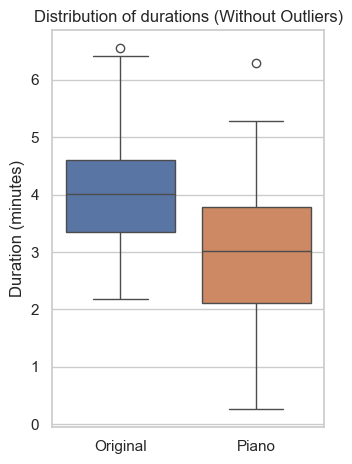

In [44]:
# Visualizing distribution after minimizing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_no_outliers['Original Duration (min)'], df_no_outliers['Piano Duration (min)']])
plt.title('Distribution of durations (Without Outliers)')
plt.xticks([0, 1], ['Original', 'Piano'])
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

In [45]:
# Showing statistics
print(f"Number of original songs: {len(df)}")
print(f"Number of songs after removing outliers: {len(df_no_outliers)}")
print(f"Number of removed outliers: {len(df) - len(df_no_outliers)}")

Number of original songs: 134
Number of songs after removing outliers: 125
Number of removed outliers: 9


In [46]:
# Showing the removed songs (outliers)
outliers_mask = ~df.index.isin(df_no_outliers.index)
display(df[outliers_mask][['Track Name', 'Artist', 'Original Duration (min)', 'Piano Duration (min)']])

,Track Name,Artist,Original Duration (min),Piano Duration (min)
26,Um Amor Puro,Djavan,5.483333,9.000000
58,Mais Ninguém,Banda do Mar,2.800000,9.433333
64,Lembra de Mim - Ao Vivo,Ivan Lins,4.316667,10.866667
123,Minto pra quem perguntar,ANAVITÓRIA,3.133333,6.750000
124,Quando Bate Aquela Saudade,Rubel,6.750000,0.416667
126,Carta de Amor (Ao Vivo),Maria Bethânia,93.050000,3.000000
133,Partilhar,Rubel,7.050000,3.983333
164,É Você,Pedro Caetano,2.466667,8.000000
190,O Telefone Tocou Novamente,Jorge Ben Jor,3.833333,34.750000


In [47]:
# Statistics of durations after removing outliers
display(df_no_outliers[duration_columns].describe())

,Original Duration (min),Piano Duration (min)
count,125.000000,125.000000
mean,4.030533,2.936667
std,0.895815,1.192981
min,2.183333,0.266667
25%,3.350000,2.116667
50%,4.016667,3.016667
75%,4.600000,3.783333
max,6.550000,6.300000
